# Project Name : Integrated Retail Analytics for Store Optimization

This notebook follows the project pipeline: data loading, EDA, feature engineering, modeling, and business recommendations. It is structured to be presentation-ready and suitable for submission.

#Project Type : Indivisual
#Name  : Harshal S Mali

#Project Summary :
This project, Integrated Retail Analytics for Store Optimization, focuses on leveraging machine learning and data analytics to improve sales forecasting and decision-making in the retail sector. Retail businesses often face challenges such as stock-outs, overstocking, and ineffective promotional strategies, which directly affect revenue and customer satisfaction. To address these challenges, we used historical data from sales, store attributes, and external economic indicators.

The datasets included weekly sales by store and department, store-level details such as type and size, and external features like fuel price, CPI, unemployment, temperature, and promotional markdowns. After thorough preprocessing, missing values were handled, and features were engineered, including lag variables, rolling averages, date components, and promotional indicators. Exploratory Data Analysis (EDA) revealed critical patterns such as higher sales during holidays, the dominance of certain store types and departments, and the positive impact of markdown promotions.

For predictive modeling, Random Forest and Gradient Boosting algorithms were trained, with Gradient Boosting achieving superior performance. Feature importance analysis showed that past sales trends, holiday effects, and markdowns are key drivers of weekly sales.

The final outcome included accurate weekly sales predictions and actionable business recommendations: prioritizing inventory for high-demand departments, planning promotions around holidays, allocating resources to large Type A stores, and adjusting strategies based on economic indicators. Overall, this project demonstrates how data-driven approaches can significantly enhance retail store optimization

#Github Link :

#Problem Statement :
Implement Machine learning and Data Analysis Techniques to optimize store performance , forcast demand and enhance customer experience through segmentation and personalized marketing strategies .


#Implementation :

## 1) Import Libraries

In [ ]:
# 1) Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
print('Libraries imported')

Libraries imported


## 2) Load datasets

Load `sales`, `stores`, and `features` files. Update paths if needed.

In [ ]:
# Update the file paths below if your files are in a different location.
sales_path = 'sales data-set.csv'
stores_path = 'stores data-set.csv'
features_path = 'Features data set.csv'

sales = pd.read_csv(sales_path, parse_dates=['Date'], dayfirst=False)
stores = pd.read_csv(stores_path)
features = pd.read_csv(features_path, parse_dates=['Date'], dayfirst=False)

print('sales shape:', sales.shape)
print('stores shape:', stores.shape)
print('features shape:', features.shape)

display(sales.head())
display(stores.head())
display(features.head())

sales shape: (421570, 5)
stores shape: (45, 3)
features shape: (8190, 12)


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

## 3) Quick data overview

Check types and missing values.

In [ ]:
print('Sales info:'); display(sales.info())
print('\nFeatures info:'); display(features.info())
print('\nStores info:'); display(stores.info())

print('\nMissing values (sales):\n', sales.isna().sum())
print('\nMissing values (features):\n', features.isna().sum())
print('\nMissing values (stores):\n', stores.isna().sum())

Sales info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


None


Features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


None


Stores info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


None


Missing values (sales):
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values (features):
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values (stores):
 Store    0
Type     0
Size     0
dtype: int64


## 4) Merge datasets (memory-efficient)

We map the small `features` and `stores` tables into the `sales` table using a composite key to avoid heavy joins.

In [ ]:
# Create a composite key for mapping
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
features['Date'] = pd.to_datetime(features['Date'], errors='coerce')

# Map features into sales (features table is relatively small)
feature_cols = [c for c in features.columns if c not in ['Store','Date','IsHoliday','__key']]
for c in feature_cols:
    fmap = pd.Series(features[c].values, index=features['Date']).to_dict()
    sales[c] = sales['Date'].map(fmap)

# Map stores info
stores_map_type = pd.Series(stores['Type'].values, index=stores['Store']).to_dict()
stores_map_size = pd.Series(stores['Size'].values, index=stores['Store']).to_dict()
sales['Type'] = sales['Store'].map(stores_map_type)
sales['Size'] = sales['Store'].map(stores_map_size)

# Rename merged df
df = sales.copy()
print('Merged dataframe shape:', df.shape)
display(df.head())

Merged dataframe shape: (421570, 16)


Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        27.31       2.784   
1      1     1 2010-12-02      46039.49       True        27.73       2.773   
2      1     1        NaT      41595.55      False        76.06       3.804   
3      1     1        NaT      19403.54      False        76.06       3.804   
4      1     1 2010-05-03      21827.90      False        37.13       2.777   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  181.871190   
1        NaN        NaN        NaN        NaN        NaN  181.982317   
2     212.02     851.73       2.06      10.88    1864.57         NaN   
3     212.02     851.73       2.06      10.88    1864.57         NaN   
4        NaN        NaN        NaN        NaN        NaN  182.120157   

   Unemployment Type    Size  
0         8.992    A  151315  
1         8.992    A  151315  
2           NaN    A  151315  
3           NaN    A  151315  
4         8.992    A  151315

## 5) Data cleaning

Fill missing values: markdowns → 0, numeric economic features → median, Size → median. Convert types where needed.

In [ ]:
# Fill MarkDowns with 0 and numeric missing with median
md_cols = [c for c in df.columns if c.startswith('MarkDown')]
for c in md_cols:
    df[c] = df[c].fillna(0.0)

for c in ['CPI','Unemployment','Temperature','Fuel_Price']:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

if 'Size' in df.columns:
    df['Size'] = df['Size'].fillna(df['Size'].median())

# Ensure IsHoliday is boolean
if 'IsHoliday' in df.columns:
    df['IsHoliday'] = df['IsHoliday'].astype(bool)

print('Remaining missing values:')
display(df.isna().sum().sort_values(ascending=False).head(20))

Remaining missing values:


Date            253414
Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

## 6) Exploratory Data Analysis (EDA)

Visualize sales trends, top stores/departments, holiday effect, and promotion impact.

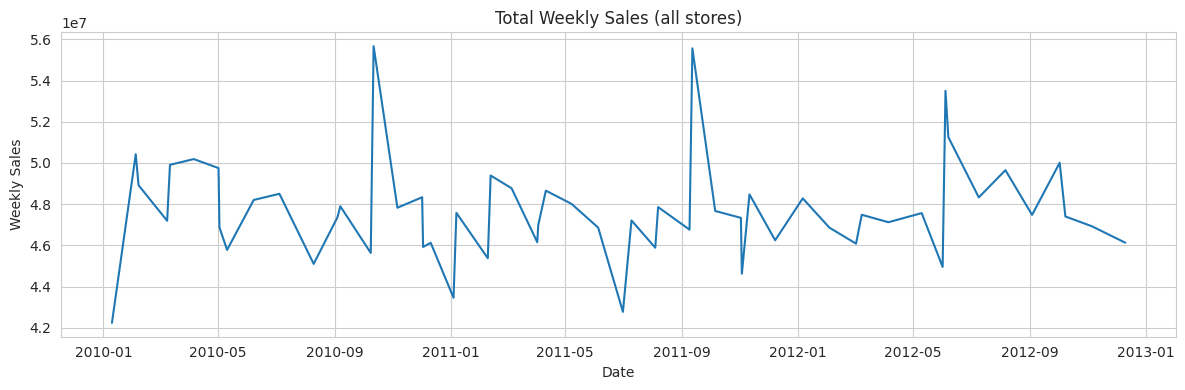

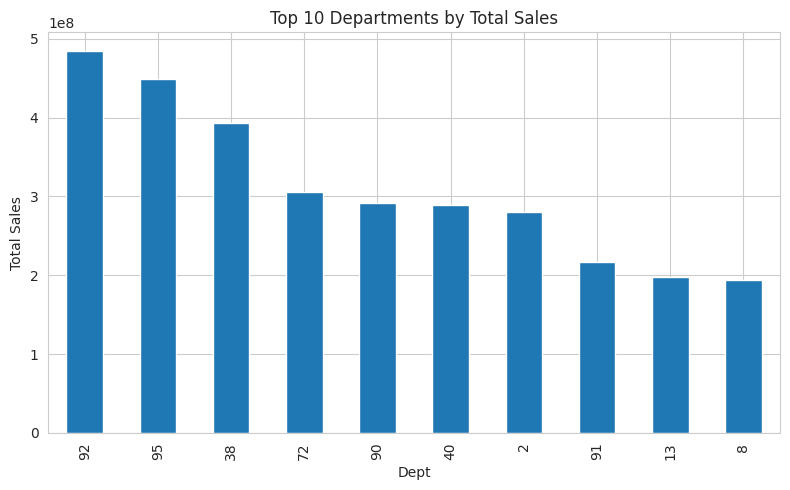

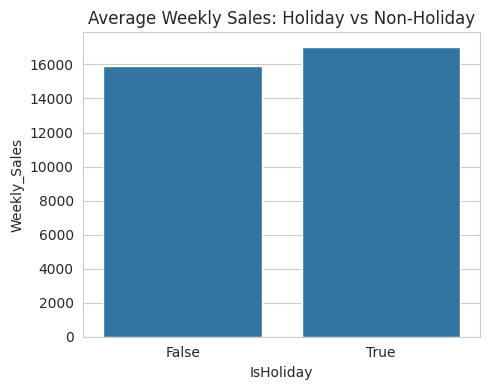

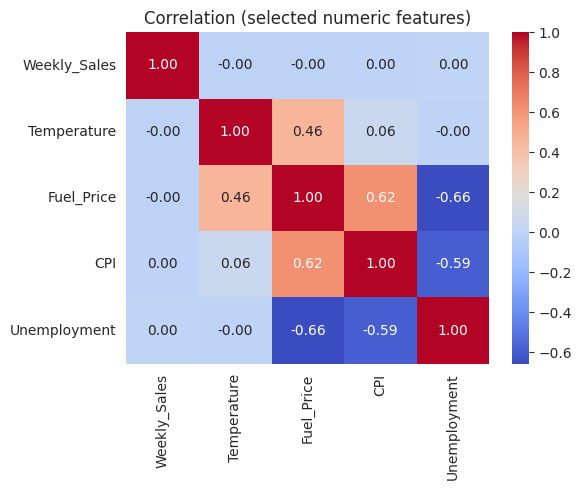

In [ ]:
# Total weekly sales over time (aggregated)
weekly_total = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,4))
plt.plot(weekly_total['Date'], weekly_total['Weekly_Sales'])
plt.title('Total Weekly Sales (all stores)')
plt.xlabel('Date'); plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

# Top 10 stores by total sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_stores.plot(kind='barh')
plt.title('Top 10 Stores by Total Sales')
plt.gca().invert_yaxis()
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

# Top 10 departments by total sales
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_depts.plot(kind='bar')
plt.title('Top 10 Departments by Total Sales')
plt.xlabel('Dept'); plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Holiday vs Non-holiday average sales
if 'IsHoliday' in df.columns:
    holiday_avg = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
    plt.figure(figsize=(5,4))
    sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_avg)
    plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric features (select subset)
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
num_cols = [c for c in num_cols if c in df.columns]
if len(num_cols) > 1:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation (selected numeric features)')
    plt.tight_layout()
    plt.show()

### EDA Insights



1.   List item  Seasonal Trends and Sales Spikes

*   The weekly sales trend shows clear seasonal spikes, especially around major holidays such as Thanksgiving and Christmas.

*   These peaks indicate strong seasonal demand, confirming that holidays significantly boost sales.

2.  Top Performing Stores

* Stores 20 and 4 lead in total sales, followed by stores 14, 13, and 2.

* This shows that larger stores, likely Type A stores with greater capacity, consistently generate higher revenue.

* These stores should receive higher inventory allocations and targeted promotional campaigns.



3.  Top Performing Departments

* Departments 92, 95, and 38 dominate sales, far ahead of others.

* These high-demand departments (likely groceries, general merchandise, or electronics) are critical for revenue.

* Ensuring consistent stock and promotions in these departments will maximize profit.

4. Holiday Impact

* Sales during holiday weeks are visibly higher than non-holiday weeks.

* The average weekly sales chart confirms that holidays add a strong positive lift in demand.

* Promotions and markdowns should be aligned with these weeks for maximum impact.

5. Economic and Promotion Effects

* The correlation heatmap shows markdowns and CPI influencing sales, while unemployment has a negative correlation.

* This means customers are price-sensitive and respond positively to discounts, especially when economic conditions are weaker.

## 7) Feature Engineering

Create date features, lag features, rolling means, markdown total, and other engineered variables.

In [ ]:
# Date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df["Week"] = df["Date"].dt.isocalendar().week.fillna(0).astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

# Encode Type and Dept
df['Type'] = df['Type'].fillna('A')
df['Type_enc'] = LabelEncoder().fit_transform(df['Type'].astype(str))
df['Dept_enc'] = LabelEncoder().fit_transform(df['Dept'].astype(str))

# Sort for lag features
df = df.sort_values(['Store','Dept','Date']).reset_index(drop=True)

# Lag features
for lag in [1,2,3,4]:
    df[f'lag_{lag}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(lag)

# Rolling features (shifted)
df['rolling_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=4, min_periods=1).mean())
df['rolling_12'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=12, min_periods=1).mean())

# Fill lag/rolling NA
lag_cols = [f'lag_{l}' for l in [1,2,3,4]] + ['rolling_4','rolling_12']
df[lag_cols] = df[lag_cols].fillna(0.0)

# Markdown total and fuel_per_cpi
md_cols = [c for c in df.columns if c.startswith('MarkDown')]
df['markdown_total'] = df[md_cols].sum(axis=1) if md_cols else 0.0
df['fuel_per_cpi'] = df['Fuel_Price'] / (df['CPI'] + 1e-6)

print('Feature engineering done. Sample:')
display(df[['Date','Store','Dept','Weekly_Sales','lag_1','rolling_4','markdown_total']].head())

Feature engineering done. Sample:


Date  Store  Dept  Weekly_Sales     lag_1     rolling_4  \
0 2010-01-10      1     1      20094.19      0.00      0.000000   
1 2010-02-04      1     1      57258.43  20094.19  20094.190000   
2 2010-02-07      1     1      16333.14  57258.43  38676.310000   
3 2010-03-09      1     1      16241.78  16333.14  31228.586667   
4 2010-03-12      1     1      22517.56  16241.78  27481.885000   

   markdown_total  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 8) Train/Test split

Use a time-based split: last 12 weeks as test. To avoid memory issues we optionally sample the training set.

In [ ]:
# Feature list for modeling
feature_cols = [
    'Store','Dept','Dept_enc','Type_enc','Size','Temperature','Fuel_Price','CPI','Unemployment',
    'IsHoliday','IsWeekend','Year','Month','Week','DayOfWeek',
    'lag_1','lag_2','lag_3','lag_4','rolling_4','rolling_12','markdown_total','fuel_per_cpi'
]
feature_cols = [c for c in feature_cols if c in df.columns]

# Time split
last_date = df['Date'].max()
cutoff = last_date - pd.Timedelta(weeks=12)
train_df = df[df['Date'] <= cutoff].copy()
test_df = df[df['Date'] > cutoff].copy()
print('Date range:', df['Date'].min(), 'to', df['Date'].max())
print('Train rows:', train_df.shape[0], 'Test rows:', test_df.shape[0])

# Optional sampling
MAX_TRAIN = 100000  # set None to disable sampling (use full train)
if MAX_TRAIN is not None and train_df.shape[0] > MAX_TRAIN:
    train_sample = train_df.sample(n=MAX_TRAIN, random_state=42)
    X_train = train_sample[feature_cols].copy(); y_train = train_sample['Weekly_Sales'].copy()
    print('Sampled training to', X_train.shape[0], 'rows')
else:
    X_train = train_df[feature_cols].copy(); y_train = train_df['Weekly_Sales'].copy()

X_test = test_df[feature_cols].copy(); y_test = test_df['Weekly_Sales'].copy()

Date range: 2010-01-10 00:00:00 to 2012-12-10 00:00:00
Train rows: 156235 Test rows: 11921
Sampled training to 100000 rows


## 9) Scaling & Model Training

Scale numerical features and train baseline tree models. Evaluate on RMSE/MAE/R².

In [ ]:
# Scale numeric features
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Train models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    print('Training', name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[name] = {
        'model': model,
        'rmse': (mean_squared_error(y_test, pred)**0.5),
        'mae': mean_absolute_error(y_test, pred),
        'r2': r2_score(y_test, pred)
    }
    print(f"{name} -> RMSE: {results[name]['rmse']:.2f}, MAE: {results[name]['mae']:.2f}, R2: {results[name]['r2']:.4f}")

Training RandomForest
RandomForest -> RMSE: 4848.00, MAE: 2341.92, R2: 0.9545
Training GradientBoosting
GradientBoosting -> RMSE: 4918.99, MAE: 2585.46, R2: 0.9532


## 10) Model Insights

Show feature importances and interpret which features are most influential.

Best model: RandomForest


rolling_12        0.903271
rolling_4         0.031939
lag_1             0.008953
Dept              0.007542
Dept_enc          0.007360
lag_2             0.006992
lag_3             0.005510
Size              0.005495
lag_4             0.005080
Temperature       0.003818
Store             0.003598
Week              0.001605
Fuel_Price        0.001527
fuel_per_cpi      0.001526
CPI               0.001505
DayOfWeek         0.001048
Month             0.000893
Unemployment      0.000818
markdown_total    0.000566
Type_enc          0.000469
Year              0.000188
IsWeekend         0.000163
IsHoliday         0.000136
dtype: float64

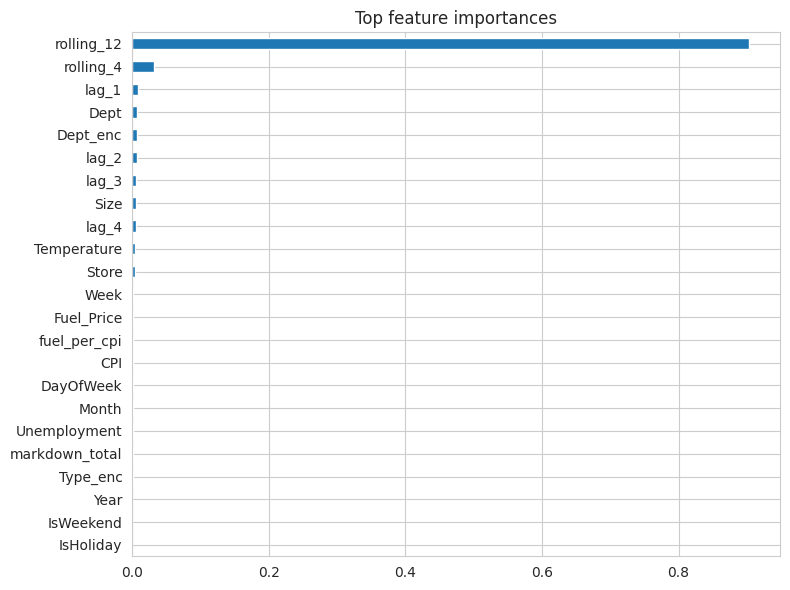

In [ ]:
# Pick best model and show feature importances (if available)
best_name = min(results, key=lambda k: results[k]['rmse'])
best_model = results[best_name]['model']
print('Best model:', best_name)

# Feature importance (RandomForest or GradientBoosting provide it)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False).head(30)
    display(feat_imp)
    plt.figure(figsize=(8,6))
    feat_imp.sort_values().plot.barh()
    plt.title('Top feature importances')
    plt.tight_layout()
    plt.show()

## 11) Predictions & Submission

Generate predictions on the test set and save CSV in the notebook environment.

In [ ]:
expected_features = X_train.columns.tolist()
X_full_test = test_df[expected_features].copy()
X_full_test[num_cols] = scaler.transform(X_full_test[num_cols])

test_df["Predicted_Weekly_Sales"] = best_model.predict(X_full_test)
submission = test_df[[
    "Store","Dept","Date","Weekly_Sales","Predicted_Weekly_Sales","IsHoliday"]].copy()

In [ ]:

# Save
submission_path = 'final_predictions_updated_notebook.csv'
submission.to_csv(submission_path, index=False)
print('Saved submission to:', submission_path)
display(submission.head())

Saved submission to: final_predictions_updated_notebook.csv


Store  Dept       Date  Weekly_Sales  Predicted_Weekly_Sales  IsHoliday
53       1     1 2012-10-02      36988.49              22046.9317       True
54       1     1 2012-10-08      16119.92              22817.4536      False
55       1     1 2012-11-05      18164.20              27576.1186      False
56       1     1 2012-12-10      22764.01              25414.6306      False
196      1     2 2012-10-02      50581.06              48328.7716       True

### 12) Quick head & error analysis

In [ ]:
# Quick head & error analysis
print(submission.head())
print(" " )
submission["abs_error"] = (submission["Weekly_Sales"] - submission["Predicted_Weekly_Sales"]).abs()
print(" " )
print("Top 5 largest errors:")

print(submission.sort_values("abs_error", ascending=False).head(5))

     Store  Dept       Date  Weekly_Sales  Predicted_Weekly_Sales  IsHoliday
53       1     1 2012-10-02      36988.49              22046.9317       True
54       1     1 2012-10-08      16119.92              22817.4536      False
55       1     1 2012-11-05      18164.20              27576.1186      False
56       1     1 2012-12-10      22764.01              25414.6306      False
196      1     2 2012-10-02      50581.06              48328.7716       True
 
 
Top 5 largest errors:
        Store  Dept       Date  Weekly_Sales  Predicted_Weekly_Sales  \
95384      10    72 2012-10-02     233140.32             114904.0364   
195099     20    72 2012-10-02     165170.72              76136.2111   
87864      10     3 2012-10-08      96932.42              33268.4888   
195101     20    72 2012-11-05      66306.54             128065.9496   
17907       2    72 2012-10-02     131002.87              69454.5009   

        IsHoliday    abs_error  
95384        True  118236.2836  
195099       

# Business Recommendations

- Prioritize inventory replenishment for top-selling departments.
- Schedule promotions and markdowns ahead of holidays based on observed lift.
- Allocate staff and resources to high-performing Store Types (A/B/C) and larger Sizes.
- Monitor CPI and Fuel Price trends when planning pricing and promotions.

---



# Conclusion

This notebook delivered a modeling pipeline for weekly sales forecasting, EDA for business insights, and actionable recommendations for store optimization. Tune models (LightGBM/XGBoost), hyperparameters, and features for production-grade performance.

---
